### Stationarity

In [79]:
import numpy as np
import pandas as pd

Let's check stationarity

In [26]:
from utils import get_apple_stock, adf_test

In [139]:
apple_stock = get_apple_stock()

adf_test(apple_stock['Close'])

Let's try differencing

In [140]:
from utils import difference

In [141]:
diffed_series = difference(apple_stock['Close'], 1)

In [142]:
adf_test(diffed_series)

Results of Dickey-Fuller Test:
Test Statistic                -1.623497e+01
p-value                        3.778045e-29
Lags Used                      3.600000e+01
Number of Observations Used    9.662000e+03
Critical Value (1%)           -3.431027e+00
Critical Value (5%)           -2.861839e+00
Critical Value (10%)          -2.566929e+00
dtype: float64


We can see that our statistic value of -16 is less than the value of -3.431 at 1%. This suggests that we can reject the null hypothesis with a significance level of less than 1% (i.e. a low probability that the result is a statistical fluke). Rejecting the null hypothesis means that the process has no unit root, and in turn that the time series is stationary or does not have time-dependent structure.

In [35]:
from utils import plot_series

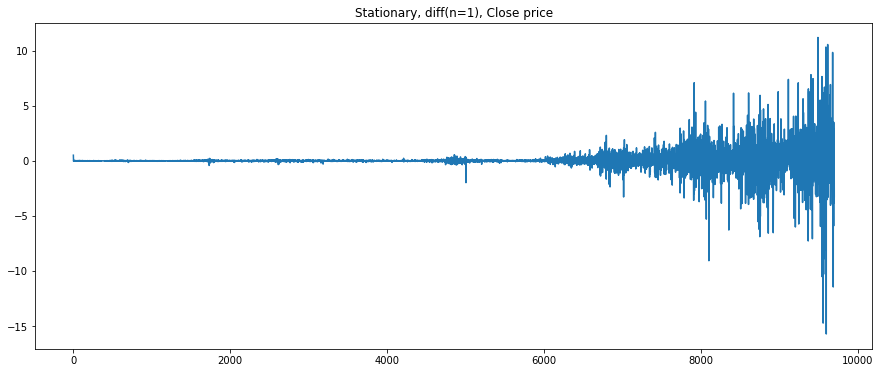

In [36]:
plot_series(diffed_series, 'Stationary, diff(n=1), Close price')

### Trend and Seasonality

A trend can be removed from your time series data (and data in the future) as a data preparation and cleaning exercise. This is common when using statistical methods for time series forecasting, but does not always improve results when using machine learning models. Alternately, a trend can be added, either directly or as a summary, as a new input variable to the supervised learning problem to predict the output variable.

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.linear_model import LinearRegression

In [39]:
X = np.array([i for i in range(0, len(apple_stock))]).reshape(-1, 1)
y = np.array(apple_stock['Close']).reshape(-1, 1)

In [40]:
linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
trend = linear_regressor.predict(X)

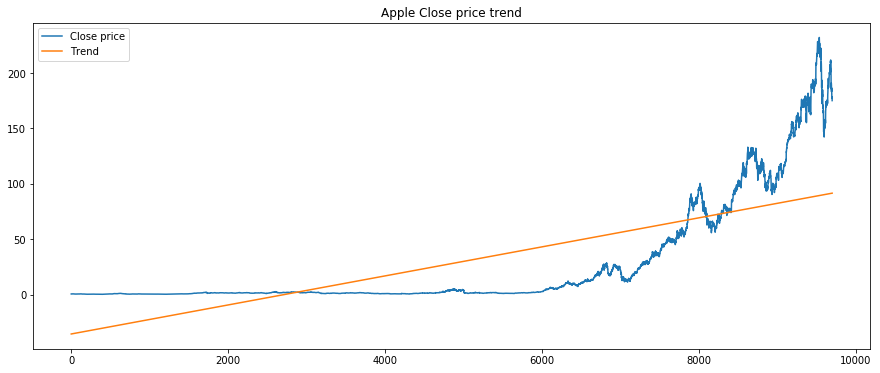

In [44]:
fig, ax = plt.subplots(figsize=(15, 6))
plt.plot(y)
plt.plot(trend)
ax.set_title('Apple Close price trend')
ax.legend(['Close price', 'Trend'])

In [45]:
detrended_price = [y[i]-trend[i] for i in range(0, len(apple_stock))]

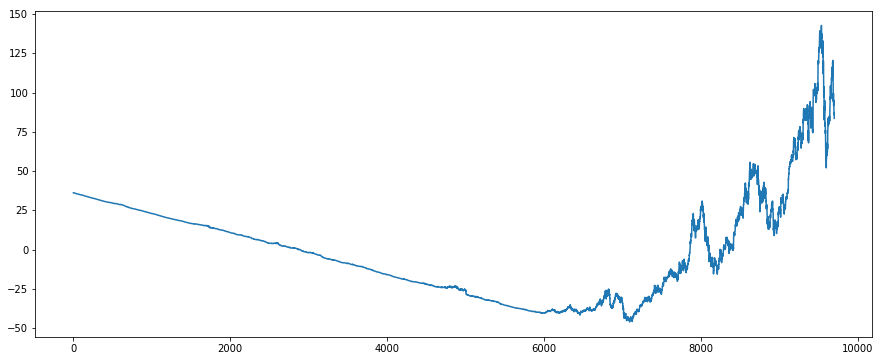

In [46]:
plot_series(detrended_price)

There seems to be a parabola in the residuals, suggesting that perhaps a polynomial fit may have done a better job

In [47]:
from numpy import polyfit

In [58]:
degree = 4
X1d = X.flatten()
y1d = y.flatten()
coef = polyfit(X1d, y1d, degree) 
print('Coefficients: %s' % coef)

Coefficients: [ 7.54975843e-14 -6.34433691e-10  1.09347483e-06  1.11302440e-03
 -6.38839677e-01]


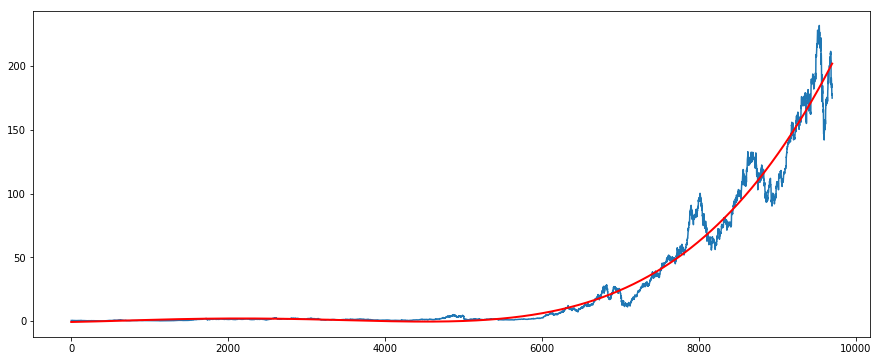

In [59]:
# create curve
curve = list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
        value += X[i]**(degree-d) * coef[d]
    curve.append(value)
    
# plot curve over original data
plt.subplots(figsize=(15, 6))
plt.plot(y)
plt.plot(curve, color='red', linewidth=2)

In [60]:
detrended_price = [y[i]-curve[i] for i in range(0, len(apple_stock))]

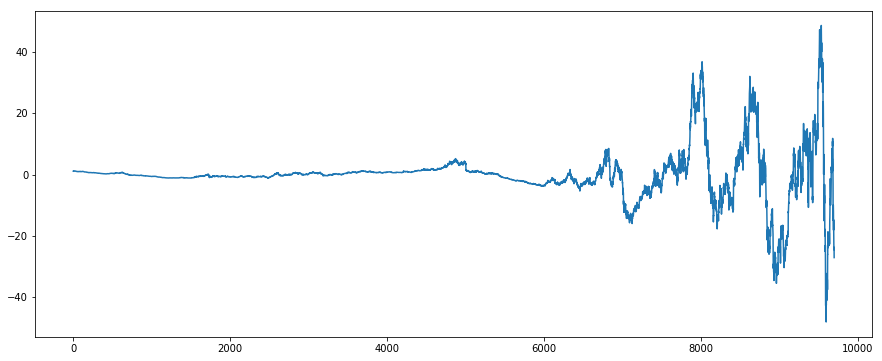

In [61]:
plot_series(detrended_price)

Let's have a look at other plots that might gives as a hint about its trend and seasonality:

In [64]:
from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

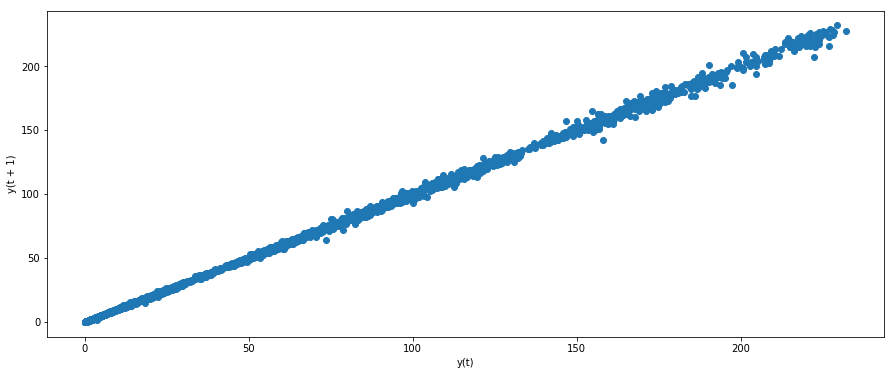

In [82]:
fig, ax = plt.subplots(figsize=(15, 6))
lag_plot(apple_stock['Close'], ax=ax)

We can see a linear pattern that indicates the data is not random, with a positive and strong correlation (autocorrelation is present). Let's remove trend and confirm we get [white noise](https://www.quantstart.com/articles/White-Noise-and-Random-Walks-in-Time-Series-Analysis)

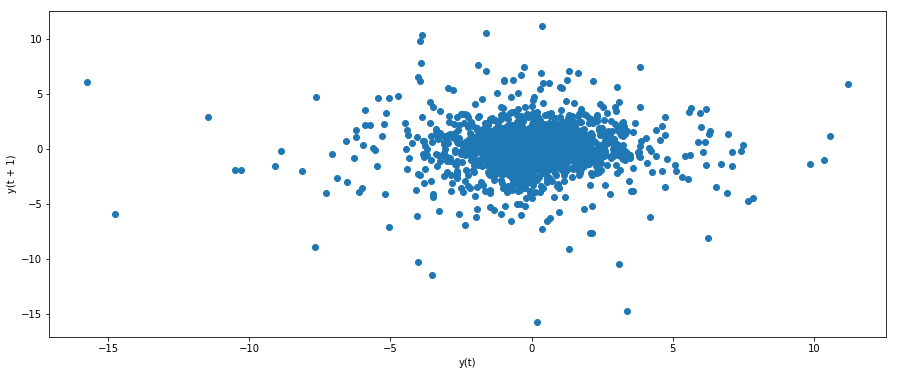

In [112]:
fig, ax = plt.subplots(figsize=(15, 6))
lag_plot(pd.Series(diffed_series), ax=ax)

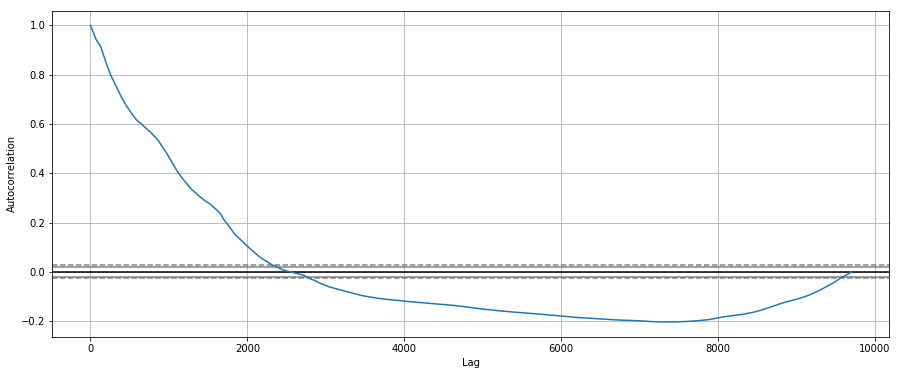

In [103]:
fig, ax = plt.subplots(figsize=(15, 6))
autocorrelation_plot(apple_stock['Close'], ax=ax)

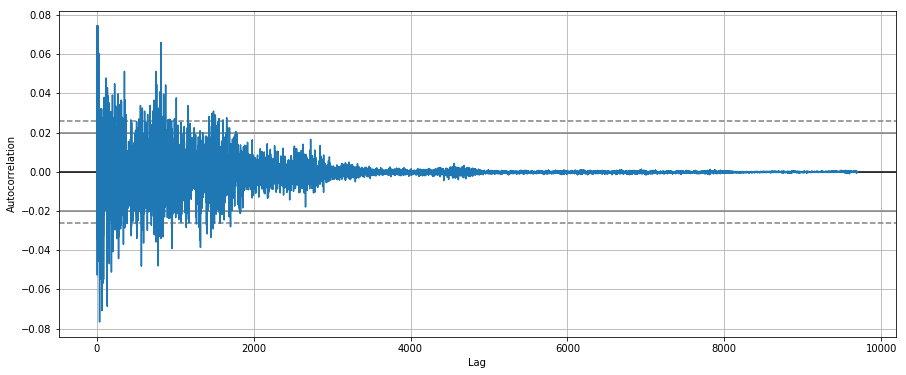

In [113]:
fig, ax = plt.subplots(figsize=(15, 6))
autocorrelation_plot(pd.Series(diffed_series), ax=ax)

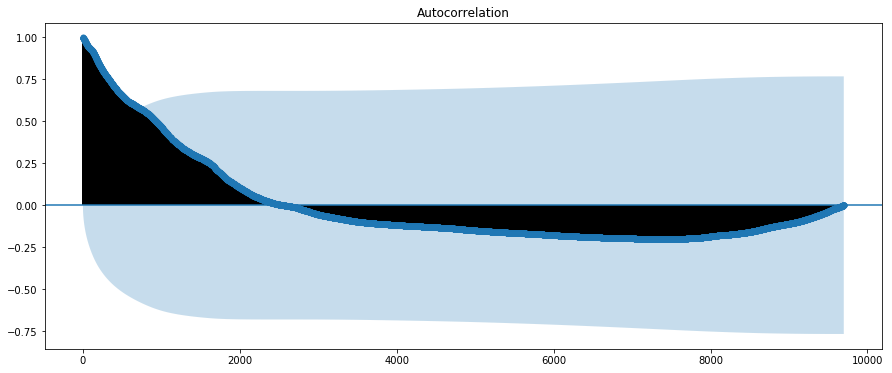

In [106]:
fig, ax = plt.subplots(figsize=(15, 6))
_ = plot_acf(apple_stock['Close'], ax=ax)

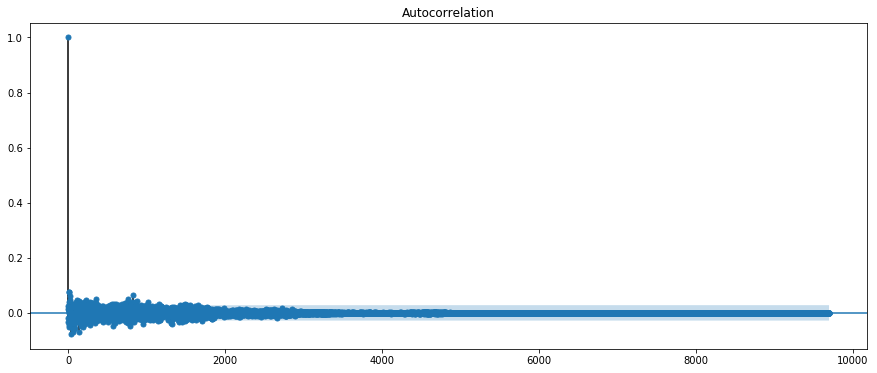

In [114]:
fig, ax = plt.subplots(figsize=(15, 6))
_ = plot_acf(pd.Series(diffed_series), ax=ax)

Decomposing the time series

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [126]:
result = seasonal_decompose(apple_stock['Close'], model='multiplicative', freq=1)

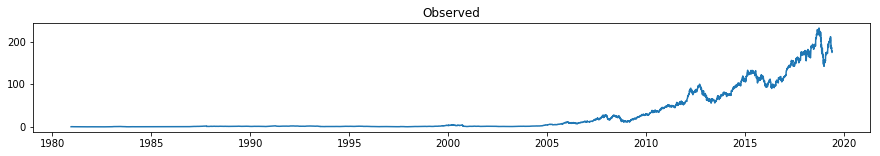

In [138]:
plot_series(result.observed, title='Observed', figsize=(15, 2))

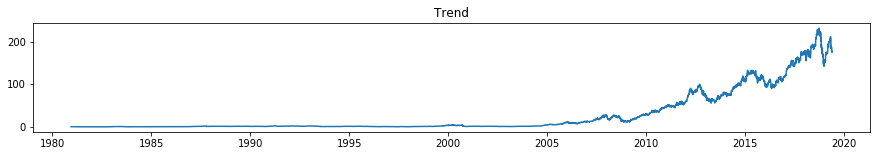

In [135]:
plot_series(result.trend, title='Trend', figsize=(15, 2))

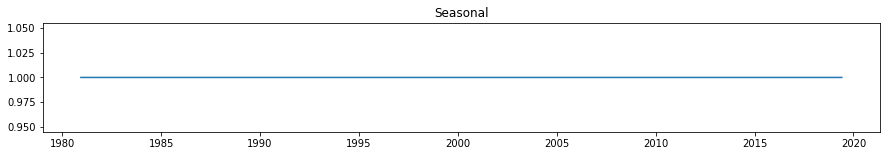

In [136]:
plot_series(result.seasonal, title='Seasonal', figsize=(15, 2))

We can confirm this timeseries is not seasonal

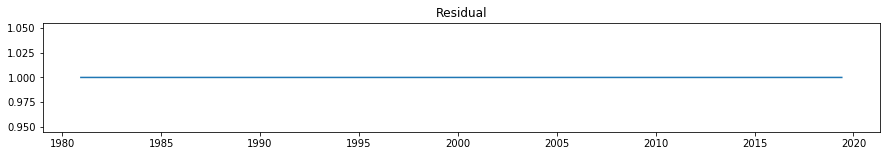

In [137]:
plot_series(result.resid, title='Residual', figsize=(15, 2))